In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# stackloss demo

df = pd.read_csv('winequality-red.csv', sep=';')
df['quality'] = df.quality.astype(float)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [2]:
# split into explanatory and response variables 
X = df.iloc[:,1:11]
Y = df.iloc[:,11]

# build and fit model
reg = linear_model.LinearRegression()
reg.fit(X,Y)

# output model
print("Coefficients:" ,reg.coef_)
print("Intercept:", reg.intercept_)

# compute predicted values
Y_pred = reg.predict(X)

# compute error statistics
mse = mean_squared_error(Y, Y_pred)
r2s = r2_score(Y, Y_pred) 
print("MSE = ", mse)
print("R2s = ", r2s)

Coefficients: [-1.07778936 -0.13532262  0.01010468 -1.96845656  0.00459164 -0.0034272
 -1.51674055 -0.54623403  0.89959004  0.29005791]
Intercept: 6.179569963472959
MSE =  0.41701074839488333
R2s =  0.3601779750226617


In [5]:
# merge observed and predicted values and compute residuals
df2 = pd.concat([Y, pd.Series(Y_pred), pd.Series(Y-Y_pred)], axis=1)
df2.columns=['observed','predicted','residual']
print(df2)

      observed  predicted  residual
0          5.0   5.028326 -0.028326
1          5.0   5.144100 -0.144100
2          5.0   5.215373 -0.215373
3          6.0   5.670522  0.329478
4          5.0   5.028326 -0.028326
5          5.0   5.061016 -0.061016
6          5.0   5.098294 -0.098294
7          7.0   5.323189  1.676811
8          7.0   5.328976  1.671024
9          5.0   5.664313 -0.664313
10         5.0   5.069123 -0.069123
11         5.0   5.664313 -0.664313
12         5.0   5.104713 -0.104713
13         5.0   5.965942 -0.965942
14         5.0   5.140208 -0.140208
15         5.0   5.176320 -0.176320
16         7.0   5.852494  1.147506
17         5.0   5.350785 -0.350785
18         4.0   5.037431 -1.037431
19         6.0   5.466242  0.533758
20         6.0   5.511351  0.488649
21         5.0   5.402927 -0.402927
22         5.0   5.745355 -0.745355
23         5.0   5.266038 -0.266038
24         6.0   5.540611  0.459389
25         5.0   5.432905 -0.432905
26         5.0   5.530262 -0

In [6]:
# normalize variables and rerun MLR analysis to
# estimate variable importance.

scaler = StandardScaler()
dfn = pd.DataFrame(scaler.fit_transform(df))
Xn = dfn.iloc[:,1:11]
Yn = dfn.iloc[:,11]

reg2 = linear_model.LinearRegression()
reg2.fit(Xn,Yn)
print("Standardized variables...")
print("Coefficients:" ,reg2.coef_)
print("Intercept:", reg2.intercept_)

dfn.head()

Standardized variables...
Coefficients: [-0.23897468 -0.0326424   0.01764167 -0.11472203  0.05947383 -0.13960288
 -0.00354471 -0.10442587  0.18882189  0.38276004]
Intercept: 3.9862494897449774e-16


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


# 5 most useful variables are: alcohol, fixed acidity, sulphates, free sulfur dioxide, residual sugar

In [11]:
# split into explanatory and response variables 
X = Xn

Y = Yn

# build and fit model
reg = linear_model.LinearRegression()
reg.fit(X,Y)

# output model
print("Coefficients:" ,reg.coef_)
print("Intercept:", reg.intercept_)

# compute predicted values
Y_pred = reg.predict(X)

# compute error statistics
mse = mean_squared_error(Y, Y_pred)
r2s = r2_score(Y, Y_pred) 
print("MSE = ", mse)
print("R2s = ", r2s)
# merge observed and predicted values and compute residuals
dfn2 = pd.concat([Y, pd.Series(Y_pred), pd.Series(Y-Y_pred)], axis=1)
dfn2.columns=['observed','predicted','residual']
dfn2.head()

Coefficients: [-0.23897468 -0.0326424   0.01764167 -0.11472203  0.05947383 -0.13960288
 -0.00354471 -0.10442587  0.18882189  0.38276004]
Intercept: 3.9862494897449774e-16
MSE =  0.6398220249773384
R2s =  0.3601779750226617


,observed,predicted,residual
0,-0.787823,-0.752736,-0.035087
1,-0.787823,-0.609330,-0.178492
2,-0.787823,-0.521046,-0.266777
3,0.450848,0.042733,0.408115
4,-0.787823,-0.752736,-0.035087


<Figure size 432x288 with 0 Axes>

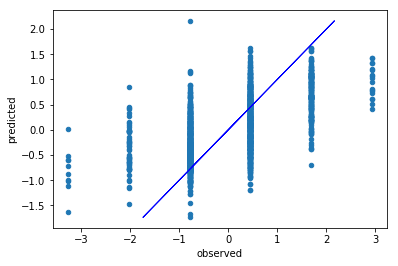

In [14]:
# plot observed vs predicted values


plt.figure()
dfn2.plot.scatter(x='observed', y='predicted')
plt.plot(Y_pred, Y_pred, color='blue', linewidth=1)
plt.show()

<Figure size 432x288 with 0 Axes>

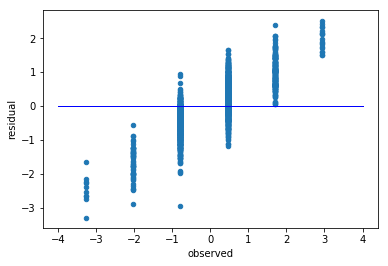

In [18]:
# plot residuals
plt.figure()
dfn2.plot.scatter(x='observed', y='residual')
plt.plot([-4,4], [0,0], color='blue', linewidth=1)
plt.show()